#klastry

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('countries of the world (2).csv')
print(df.head())

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                     

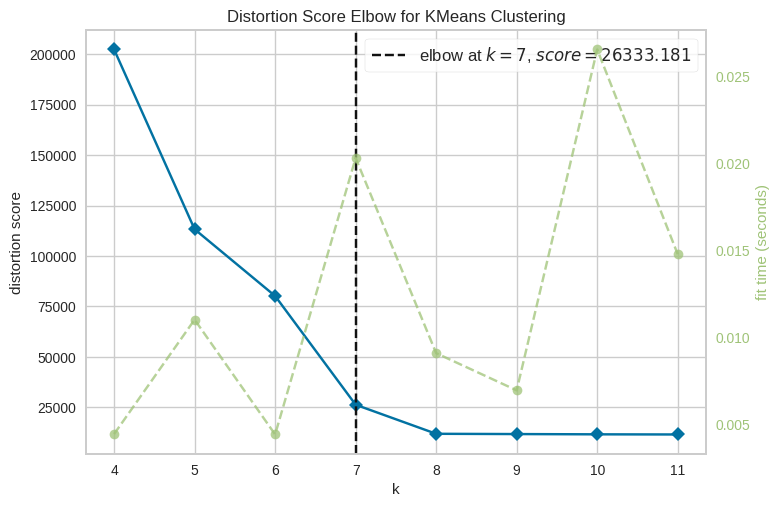

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8,
random_state=42)
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X)
# Fit the data to the
visualizer.show()
# Finalize and render the figure


In [ ]:
def clean_column(col):
    return pd.to_numeric(col.str.replace(',', '.', regex=False), errors='coerce')

In [ ]:
columns_to_clean = [
    'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration',
    'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)',
    'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
    'Agriculture', 'Industry', 'Service'
]

In [ ]:
for col in columns_to_clean:
    df[col] = clean_column(df[col])

In [ ]:
df_clean = df.dropna(subset=columns_to_clean)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[columns_to_clean])

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

<ipython-input-41-434d6273f717>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Redukcja wymiarów do 2D za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

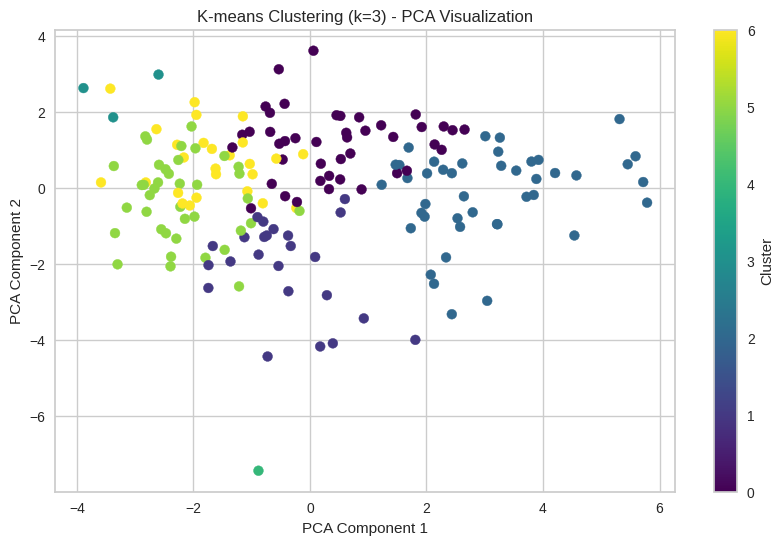

In [ ]:
# Wykres klastrów
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering (k=3) - PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

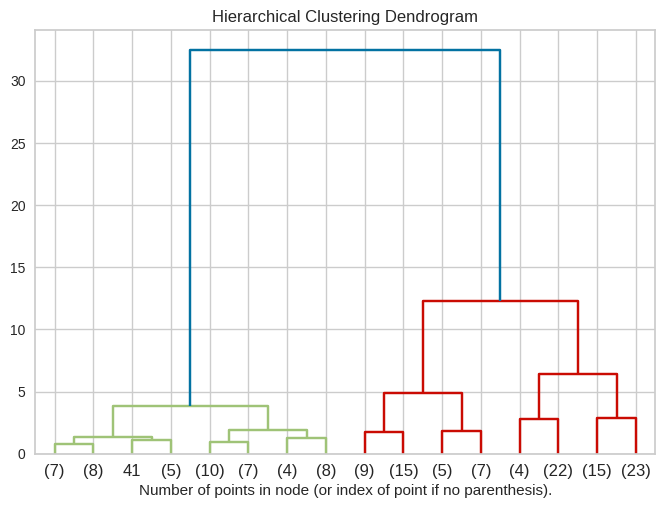

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:

import plotly.express as px

fig = px.choropleth(df_clean,
                    locations="Country",  # Replace with your actual column
                    locationmode='country names', # Specify the locationmode
                    color="Cluster",
                    hover_name="Country",  # Replace with your actual column
                    color_continuous_scale=px.colors.sequential.Plasma, # Choose a color scale
                    title="World Map with Country Clusters")
fig.show()


#2


In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset
data = pd.read_csv('GroceryStoreDataSet.csv', header=None)

# Convert the DataFrame to a list of lists
data = data[0].str.split(',').tolist()

# Initialize TransactionEncoder and transform the data
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data, columns=a.columns_)

# Calculate frequent itemsets using apriori
df = apriori(df, min_support=0.02, use_colnames=True, verbose=1) # Lowered min_support

# Generate association rules
df_ar = association_rules(df, metric="confidence", min_threshold=0.5) # Adjusted min_threshold


# Find the product pairs with the highest confidence
highest_confidence_pair = df_ar.sort_values(by="confidence", ascending=False).iloc[0]
print("Product pair with the highest confidence:")
print(f"Antecedents: {highest_confidence_pair['antecedents']}")
print(f"Consequents: {highest_confidence_pair['consequents']}")
print(f"Confidence: {highest_confidence_pair['confidence']}")

# Find the product pairs with the highest lift
highest_lift_pair = df_ar.sort_values(by="lift", ascending=False).iloc[0]
print("\nProduct pair with the highest lift:")
print(f"Antecedents: {highest_lift_pair['antecedents']}")
print(f"Consequents: {highest_lift_pair['consequents']}")
print(f"Lift: {highest_lift_pair['lift']}")

Processing 30 combinations | Sampling itemset size 5
Product pair with the highest confidence:
Antecedents: frozenset({'COCK'})
Consequents: frozenset({'COFFEE'})
Confidence: 1.0

Product pair with the highest lift:
Antecedents: frozenset({'MILK', 'CORNFLAKES'})
Consequents: frozenset({'COFFEE', 'TEA'})
Lift: 10.0


#rekomendacje


In [5]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
!unzip ml-latest-small

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [8]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [30]:
print(ratings['rating'].count())


100836


In [28]:
print(movies['movieId'].nunique())


9742


In [32]:
print(ratings['userId'].nunique())


610


In [34]:
print(ratings['userId'].value_counts().mean())


165.30491803278687


In [35]:
print(ratings['movieId'].value_counts().mean())

10.369806663924312


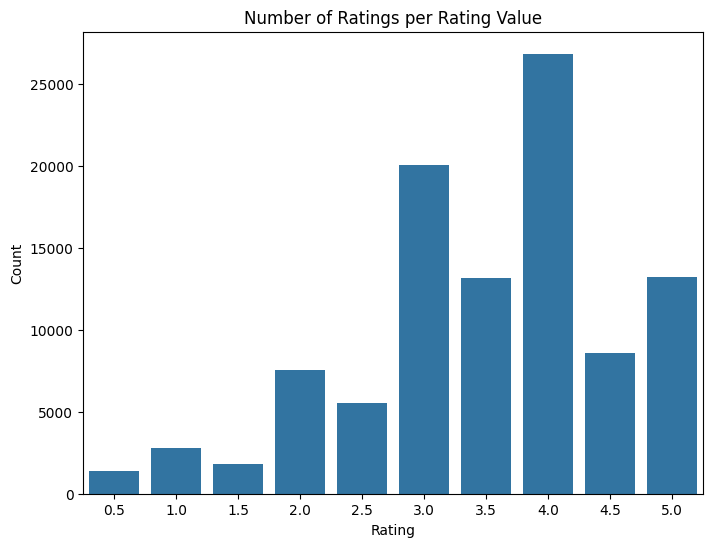

In [38]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Number of Ratings per Rating Value')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [10]:
movie_title_dict = dict(zip(movies['movieId'], movies['title']))

def get_movie_title(movie_id):
  return movie_title_dict.get(movie_id)


In [11]:
C = ratings['rating'].count().mean()
m = ratings['rating'].mean()

def bayesian_avg(ratings):
  bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
  return bayesian_avg

bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movies.merge(bayesian_avg_ratings, on='movieId')

print(movie_stats.head(10))

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  bayesian_avg  
0  Adventure|Animation|Children|Comedy|Fantasy      3.502449  
1                   Adventure|Children|Fantasy      3.501481  
2                               Comedy|Romance      3.501432  
3                         Comedy|Drama|Romance      3.501478  
4                                       Comedy      3.501348  
5                        Action|Crime|Thriller      3.502006  
6       

In [1]:
!pip install surprise

In [2]:
!pip install numpy==1.24.3

In [3]:
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader

In [12]:
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating,max_rating))
data = Dataset.load_from_df(ratings[['userId','movieId', 'rating']], reader)

In [23]:
algo = SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8645  0.8730  0.8648  0.8797  0.8749  0.8714  0.0059  
MAE (testset)     0.6633  0.6725  0.6672  0.6734  0.6703  0.6693  0.0037  
Fit time          2.24    1.48    2.03    1.41    1.44    1.72    0.34    
Test time         0.24    0.12    0.11    0.11    0.10    0.14    0.05    


{'test_rmse': array([0.86450434, 0.87297912, 0.86484852, 0.87969367, 0.8748858 ]),
 'test_mae': array([0.66332256, 0.67245931, 0.66715774, 0.6733954 , 0.67028106]),
 'fit_time': (2.241063356399536,
  1.4804887771606445,
  2.0255753993988037,
  1.411438226699829,
  1.4415624141693115),
 'test_time': (0.2429502010345459,
  0.11976218223571777,
  0.10563945770263672,
  0.1135094165802002,
  0.10459613800048828)}

In [26]:
trainset = data.build_full_trainset()
algo.fit(trainset)

# User ID
user_id = 600

rated_movies = ratings[ratings['userId'] == user_id]['movieId'].tolist()

all_movies = movies['movieId'].tolist()

unrated_movies = [movie for movie in all_movies if movie not in rated_movies]
predictions = []

for movie_id in unrated_movies:
    prediction = algo.predict(user_id, movie_id)
    predictions.append((movie_id, prediction.est))


predictions.sort(key=lambda x: x[1], reverse=True)

print(f"Top 10 recommendations for user {user_id}:")
for movie_id, rating in predictions[:10]:
    title = get_movie_title(movie_id)
    print(f"{title}: {rating}")

Top 10 recommendations for user 600:
Jaws (1975): 4.377705438619943
Lost in Translation (2003): 4.187868075636481
Room (2015): 4.10825614435646
One Flew Over the Cuckoo's Nest (1975): 4.107424023713233
Departed, The (2006): 4.107055345599379
In Bruges (2008): 4.085490345186972
Hot Fuzz (2007): 4.076945197835824
Dazed and Confused (1993): 4.067348497288931
WALL·E (2008): 4.044317349285455
Boondock Saints, The (2000): 4.03066001905442
